In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
%matplotlib inline

In [2]:
# Read in the image
image = cv2.imread("640px-Normal_posteroanterior_(PA)_chest_radiograph_(X-ray).jpg")

In [3]:
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

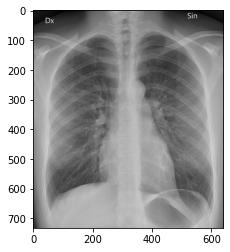

In [4]:
plt.imshow(image)

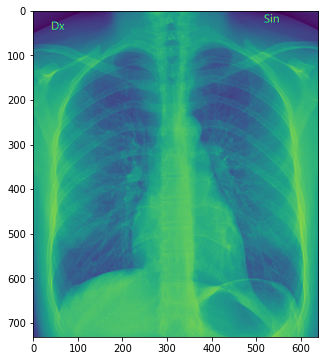

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [6]:

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

In [7]:
# Convert to float type
pixel_vals = np.float32(pixel_vals)
print(pixel_vals.shape)

(156160, 3)


In [32]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.95)
print(criteria)

(3, 200, 0.95)


In [33]:
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 8
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [34]:
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

In [35]:
print(centers)

[[ 25  24  25]
 [115 115 115]
 [ 91  91  91]
 [ 67  67  67]
 [244 120  17]
 [161 161 161]
 [139 139 139]
 [182 183 182]]


In [36]:
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

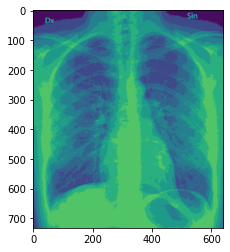

In [37]:
plt.imshow(segmented_image)